### Install requests and beautifulsoup

In [1]:
%pip install requests bs4

Note: you may need to restart the kernel to use updated packages.


### Restart and Run all the cells

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import requests 
from bs4 import BeautifulSoup

In [4]:
url = "https://www.opindia.com/latest-news/?nocache"
data = requests.get(url)
data

<Response [200]>

b'<!doctype html >\n<html lang="en-GB">\n<head>\n<meta charset="UTF-8" />\n<title>Today&#039;s Latest English News Reports from India | Archives of OpIndia</title>\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="pingback" href="https://www.opindia.com/xmlrpc.php" />\n<meta name="robots" content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" />\n<link rel="canonical" href="https://www.opindia.com/latest-news/?nocache" /><link rel="next" href="https://www.opindia.com/latest-news/page/2/?nocache" /><link rel="icon" type="image/png" href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png">\n\n<meta name="description" content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." />\n<meta property="og:locale" content="en_GB" />\n<meta property="og:type" content="article" />\n<meta property="og:title" content="Today
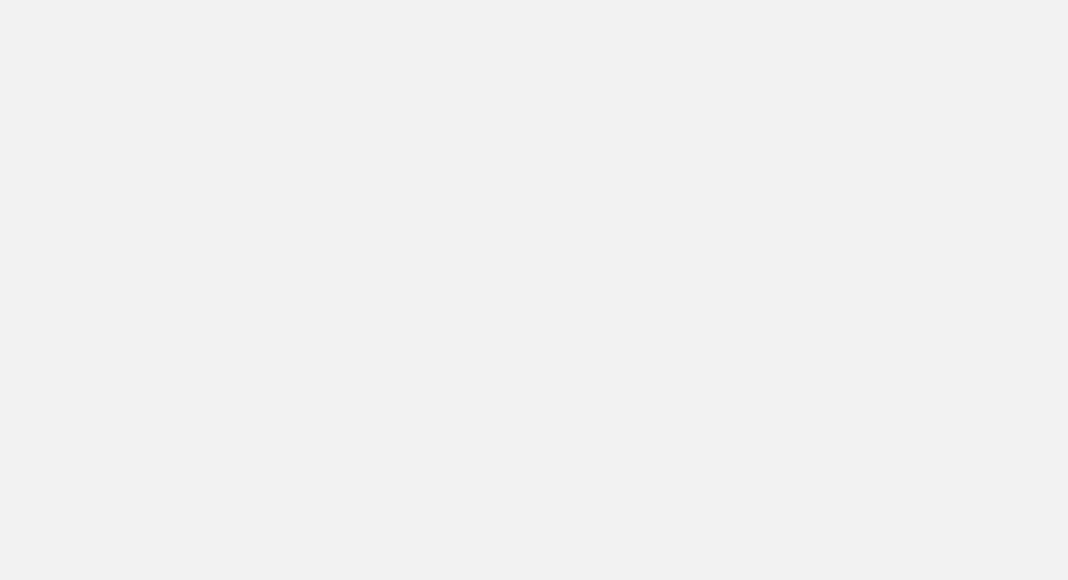

In [5]:
data.content

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link href="https://www.opindia.com/latest-news/?nocache" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Today's Latest English News Reports from India | Arc
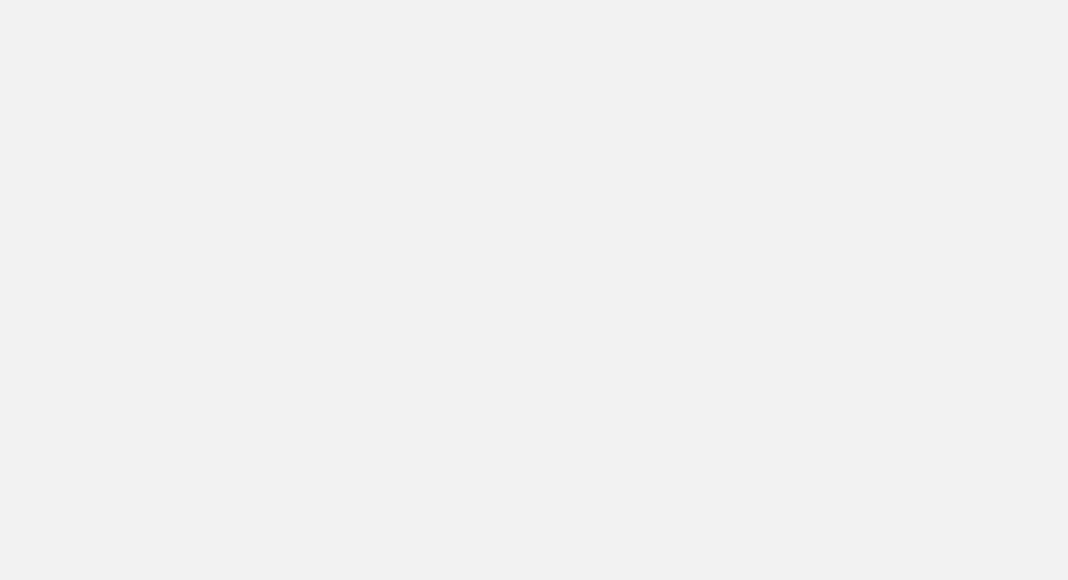

In [6]:
bs = BeautifulSoup(data.content)
bs

In [8]:
headings = bs.find_all('h3',class_="entry-title td-module-title")
headings

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/sio-jei-student-group-jamia-milia-islamia-supports-hamas-terror-attack-israel/" rel="bookmark" title="‘With Hamas’: JeI-backed student group in Jamia Millia Islamia wears headband, endorsing Hamas terrorists">‘With Hamas’: JeI-backed student group in Jamia Millia Islamia wears headband, endorsing Hamas terrorists</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10/ladakh-congress-working-president-asgar-ali-karbalai-justifies-atrocities-on-israeli-by-hamas-terrorists/" rel="bookmark" title="Ladakh Congress working president justifies Hamas atrocities on innocent Israelis, tries to falsely project ‘Palestinian Mujahideens’ as victims">Ladakh Congress working president justifies Hamas atrocities on innocent Israelis, tries to falsely project ‘Palestinian Mujahideens’ as victims</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/10

In [10]:
## Getting the URLs for News/Articles
headings[0].find('a').get('href')

'https://www.opindia.com/2023/10/sio-jei-student-group-jamia-milia-islamia-supports-hamas-terror-attack-israel/'

### Create a function to fetch all new article urls

In [12]:
def get_news_urls(url):
    data = requests.get(url)
    bs = BeautifulSoup(data.content)
    headings = bs.find_all('h3', class_="entry-title td-module-title")
    links = []
    for i in headings:
        s = i.find('a').get('href')
        links.append(s)
    return links

In [13]:
links = get_news_urls(url)

In [14]:
links

['https://www.opindia.com/2023/10/sio-jei-student-group-jamia-milia-islamia-supports-hamas-terror-attack-israel/',
 'https://www.opindia.com/2023/10/ladakh-congress-working-president-asgar-ali-karbalai-justifies-atrocities-on-israeli-by-hamas-terrorists/',
 'https://www.opindia.com/2023/10/tamil-nadu-muslim-groups-demands-release-of-muslim-prisoners-after-aiadmk-sought-release-of-coimbatore-bomb-convicts/',
 'https://www.opindia.com/2023/10/new-karnataka-education-policy-yogendra-yadav-professor-japhet-who-drafted-anti-superstition-target-hindu-rituals-committee/',
 'https://www.opindia.com/2023/10/iuml-rahul-gandhi-called-secular-extends-support-to-palestine-even-after-hamas-beheads-and-rapes-israelis/',
 'https://www.opindia.com/2023/10/lessons-hamas-attack-israel-fake-genocide-of-muslims-india-justify-genocide-hindus-language-of-oppressed/',
 'https://www.opindia.com/2023/10/ccommon-enemy-how-the-ummah-ignores-millions-of-muslim-victims-but-gets-together-against-jews-hindus-and-chri

In [15]:
len(links)

104

In [16]:
data2 = requests.get(links[0])
data2

<Response [200]>

<!DOCTYPE html >

<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>'Student group' in Jamia Millia Islamia wears 'With Hamas' headband, supports terror outfit</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Leftist and Islamist ‘student groups’ AISA and SIO in Jamia Milia Islamia had responded to the call for ‘global jihad’ by Hamas. | OpIndia News" name="description"/>
<link href="https://www.opindia.com/2023/10/sio-jei-student-group-jamia-milia-islamia-supports-hamas-terror-attack-israel/" rel="canonical">
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="'Student group' in Jamia Millia I
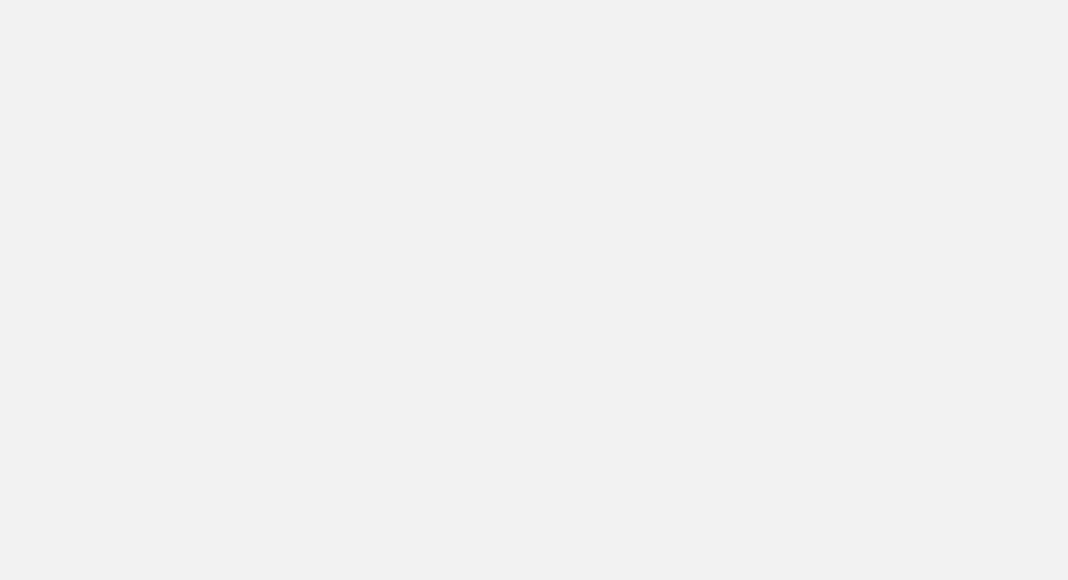

In [17]:
bs2 = BeautifulSoup(data2.content)
bs2

In [20]:
h1= bs2.find('h1',class_='tdb-title-text').text
h1

'‘With Hamas’: JeI-backed student group in Jamia Millia Islamia wears headband, endorsing Hamas terrorists'

In [21]:
t = bs2.find('time',class_='entry-date updated td-module-date')
t

<time class="entry-date updated td-module-date" datetime="2023-10-14T14:25:38+05:30">14 October, 2023 </time>

In [23]:
content = bs2.find_all('p')
content

[<p> Leftist and Islamist ‘student groups’ AISA and SIO in Jamia Milia Islamia had responded to the call for ‘global jihad’ by Hamas. </p>,
 <p>Amidst the<a href="https://www.opindia.com/tag/israel-hamas-war/" rel="noreferrer noopener" target="_blank"> ongoing war</a> between the State of Israel and Hamas, a ‘student group’ in Jamia Millia Islamia extended its <a href="https://hindi.opindia.com/national/delhi-jamia-milia-islamia-students-support-palestine-hamas-protest/" rel="noreferrer noopener" target="_blank">support </a>to the Palestine-based terror outfit. On Friday (13th October), students of the central varsity were seen wearing badges and headbands, with the words ‘with Hamas’ inscribed on them. </p>,
 <p>At the same time, they were heard raising slogans of ‘Intifada Inquilab.’ The Hamas supporters were part of the Students Islamic Organisation (SIO) of India, which is the <a href="https://www.loc.gov/item/lcwaN0008465/" rel="noreferrer noopener" target="_blank">student wing</a

In [25]:
content[0].text

' Leftist and Islamist ‘student groups’ AISA\xa0and\xa0SIO\xa0in Jamia Milia Islamia had responded to the call for ‘global jihad’ by Hamas. '

In [26]:
news = " "
for i in content:
    news = news + i.text
news


"  Leftist and Islamist ‘student groups’ AISA\xa0and\xa0SIO\xa0in Jamia Milia Islamia had responded to the call for ‘global jihad’ by Hamas. Amidst the ongoing war between the State of Israel and Hamas, a ‘student group’ in Jamia Millia Islamia extended its support to the Palestine-based terror outfit. On Friday (13th October), students of the central varsity were seen wearing badges and headbands, with the words ‘with Hamas’ inscribed on them. At the same time, they were heard raising slogans of ‘Intifada Inquilab.’ The Hamas supporters were part of the Students Islamic Organisation (SIO) of India, which is the student wing of the radical Jamaat-e-Islami Hind. The development was confirmed on X (formerly Twitter) by Swarajya journalist Swati Goel Sharma. Leftist and Islamist ‘student groups’ AISA\xa0and\xa0SIO\xa0in Jamia Milia Islamia had responded to the call for ‘global jihad’ by Hamas. Shocking. Open support to terror and massacre in Delhi’s Jamia Milia Islamia today. Students wea

In [38]:
def get_news_details(url):
    data2=requests.get(url)
    bs2 = BeautifulSoup(data2.content)
    h = bs2.find('h1','tdb-title-text').text
    t = bs2.find('time','entry-date updated td-module-date').text
    content = bs2.find_all('p')
    news =" "
    for i in content:
        news = news + i.text
    return h,t,news


In [31]:
links[0]

'https://www.opindia.com/2023/10/sio-jei-student-group-jamia-milia-islamia-supports-hamas-terror-attack-israel/'

In [40]:
h,t,news = get_news_details(links[0])

In [41]:
h

'‘With Hamas’: JeI-backed student group in Jamia Millia Islamia wears headband, endorsing Hamas terrorists'

In [42]:
t

'14 October, 2023 '

In [43]:
news

"  Leftist and Islamist ‘student groups’ AISA\xa0and\xa0SIO\xa0in Jamia Milia Islamia had responded to the call for ‘global jihad’ by Hamas. Amidst the ongoing war between the State of Israel and Hamas, a ‘student group’ in Jamia Millia Islamia extended its support to the Palestine-based terror outfit. On Friday (13th October), students of the central varsity were seen wearing badges and headbands, with the words ‘with Hamas’ inscribed on them. At the same time, they were heard raising slogans of ‘Intifada Inquilab.’ The Hamas supporters were part of the Students Islamic Organisation (SIO) of India, which is the student wing of the radical Jamaat-e-Islami Hind. The development was confirmed on X (formerly Twitter) by Swarajya journalist Swati Goel Sharma. Leftist and Islamist ‘student groups’ AISA\xa0and\xa0SIO\xa0in Jamia Milia Islamia had responded to the call for ‘global jihad’ by Hamas. Shocking. Open support to terror and massacre in Delhi’s Jamia Milia Islamia today. Students wea

### Saving all the data in dataframe

In [44]:
import pandas as pd
def get_news_dataframe(url):
    # Get New Links
    links = get_news_urls(url)
    date = [ ]
    title = [ ]
    article = [ ]
    
    # Get News Details
    for i in links:
        h,t,news = get_news_details(i)
        title.append(h)
        date.append(t)
        article.append(news)
    #Create a dictionary
    dct = {'Date':date,
           'Heading':title,
           'News':article,
           'url':links}
    df = pd.DataFrame(dct)
    return df


In [45]:
url

'https://www.opindia.com/latest-news/?nocache'

In [47]:
df = get_news_dataframe(url)

In [48]:
df

,Date,Heading,News,url
0,"14 October, 2023","“Today I realise how lucky we are as Indians”,...",Though Shehla Rashid has turned off replies t...,https://www.opindia.com/2023/10/shehla-rashid-...
1,"14 October, 2023",‘With Hamas’: JeI-backed student group in Jami...,Leftist and Islamist ‘student groups’ AISA a...,https://www.opindia.com/2023/10/sio-jei-studen...
2,"13 October, 2023",Ladakh Congress working president justifies Ha...,Umpteen visuals are available on the internet...,https://www.opindia.com/2023/10/ladakh-congres...
3,"13 October, 2023",Politics of prisoners heats up in Tamil Nadu: ...,CM Stalin questioned AIADMK for their sudden ...,https://www.opindia.com/2023/10/tamil-nadu-mus...
4,"12 October, 2023",New Karnataka education policy: Yogendra Yadav...,"It is notable that the ""Duggal Sahab"" of poli...",https://www.opindia.com/2023/10/new-karnataka-...
...,...,...,...,...
99,"13 October, 2023",Politics of prisoners heats up in Tamil Nadu: ...,CM Stalin questioned AIADMK for their sudden ...,https://www.opindia.com/2023/10/tamil-nadu-mus...
100,"13 October, 2023","Beijing, China: Israeli diplomat stabbed on ro...",The incident has come amid calls by Hamas to ...,https://www.opindia.com/2023/10/beijing-israel...
101,"13 October, 2023",France school knife attack: Man screaming ‘All...,"According to local law enforcement, an indivi...",https://www.opindia.com/2023/10/france-school-...
102,"13 October, 2023",From Kashmir to Delhi: Islamists raise anti-Is...,Hamas chief Ismail Haniyeh (2017-present) cal...,https://www.opindia.com/2023/10/indian-islamis...


## Save this to csv file

In [49]:
df.to_csv('OpIndiaNews.csv')